In [81]:
import numpy as np
import pandas as pd

df=pd.read_csv('loan2.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [82]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [84]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
import pandas as pd

Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['LoanAmount'] < Q1 - 1.5*IQR) |
              (df['LoanAmount'] > Q3 + 1.5*IQR)]

print(outliers)


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
9    LP001020    Male     Yes          1      Graduate            No   
21   LP001046    Male     Yes          1      Graduate            No   
34   LP001100    Male      No         3+      Graduate            No   
54   LP001186  Female     Yes          1      Graduate           Yes   
67   LP001233    Male     Yes          1      Graduate            No   
126  LP001448     NaN     Yes         3+      Graduate            No   
130  LP001469    Male      No          0      Graduate           Yes   
135  LP001488    Male     Yes         3+      Graduate            No   
155  LP001536    Male     Yes         3+      Graduate            No   
161  LP001562    Male     Yes          0      Graduate            No   
171  LP001585     NaN     Yes         3+      Graduate            No   
177  LP001610    Male     Yes         3+      Graduate            No   
233  LP001776  Female      No          0      Graduate          

In [85]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())


In [86]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [87]:
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'] + 1)
df['LoanAmount_log'] = np.log(df['LoanAmount'] + 1)


In [88]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


In [77]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome',
            'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [89]:
df.isnull().sum()


Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
ApplicantIncome_log    0
LoanAmount_log         0
dtype: int64

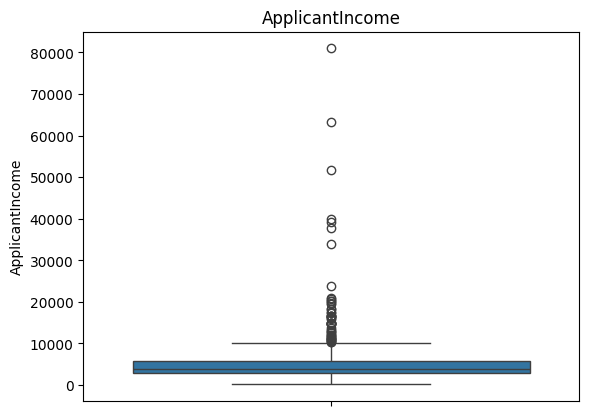

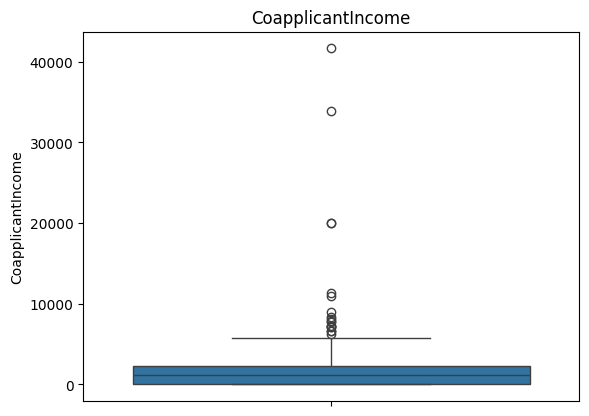

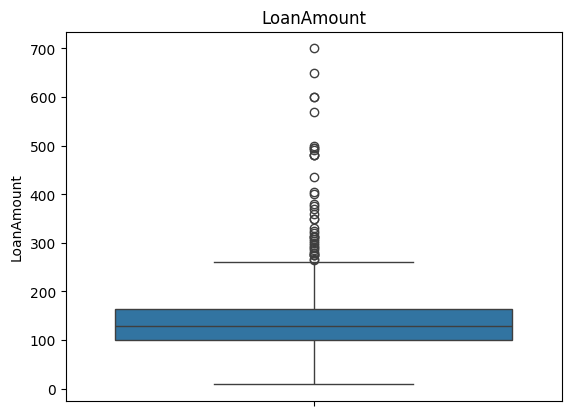

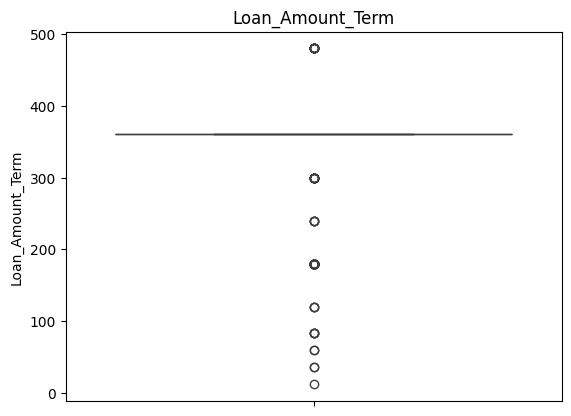

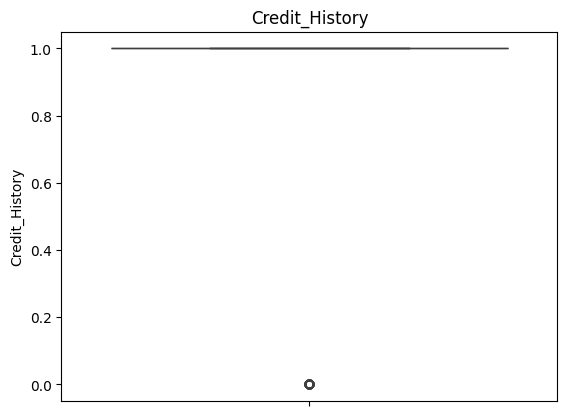

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.show()


In [80]:
df.isnull().sum()


Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status            614
ApplicantIncome_log      0
LoanAmount_log          22
dtype: int64

In [52]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df['ApplicantIncome']))
df[z < 3]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [90]:
#  Split
X = df[num_cols]
y = df['Loan_Status']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Impute (x_train is still DataFrame here)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

x_train[num_cols] = imputer.fit_transform(x_train[num_cols])
x_test[num_cols] = imputer.transform(x_test[num_cols])

#  Scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [94]:

from sklearn.svm import SVC
svm_linear=SVC(kernel='linear',C=1)
svm_linear.fit(x_train,y_train)
y_pred_linear=svm_linear.predict(x_test)

from sklearn.metrics import *

print("Acccuracy score : ",accuracy_score(y_test,y_pred_linear))
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_linear))

Acccuracy score :  0.7886178861788617
Confusion matrix : 
 [[18 25]
 [ 1 79]]


In [95]:
svm_poly=SVC(kernel='poly',degree=3,C=1)
svm_poly.fit(x_train,y_train)
y_pred_poly=svm_poly.predict(x_test)

print("Acccuracy score : ",accuracy_score(y_test,y_pred_poly))
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_poly))

Acccuracy score :  0.7967479674796748
Confusion matrix : 
 [[18 25]
 [ 0 80]]


In [ ]:
svm_rbf=SVC(kernel='rbf',gamma='scale',C=1)
svm_rbf.fit(x_train,y_train)
y_pred_rbf=svm_rbf.predict(x_test)

print("Acccuracy score : ",accuracy_score(y_test,y_pred_rbf))
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_rbf))

c=ConfusionMatrixDisplay()

Acccuracy score :  0.7723577235772358
Confusion matrix : 
 [[18 25]
 [ 3 77]]


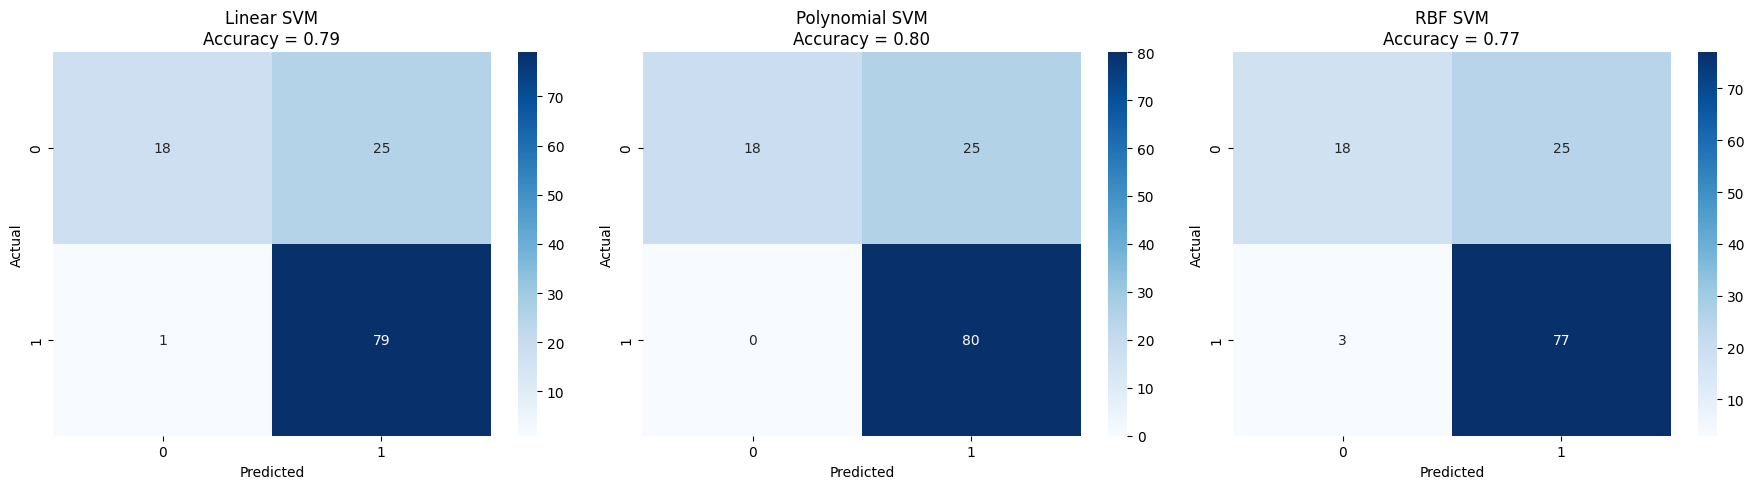

In [97]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    "Linear": SVC(kernel='linear', C=1),
    "Polynomial": SVC(kernel='poly', degree=3, C=1),
    "RBF": SVC(kernel='rbf', C=1)
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, model) in zip(axes, models.items()):
    # Train
    model.fit(x_train, y_train)
    
    # Predict
    y_pred = model.predict(x_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{name} SVM\nAccuracy = {acc:.2f}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


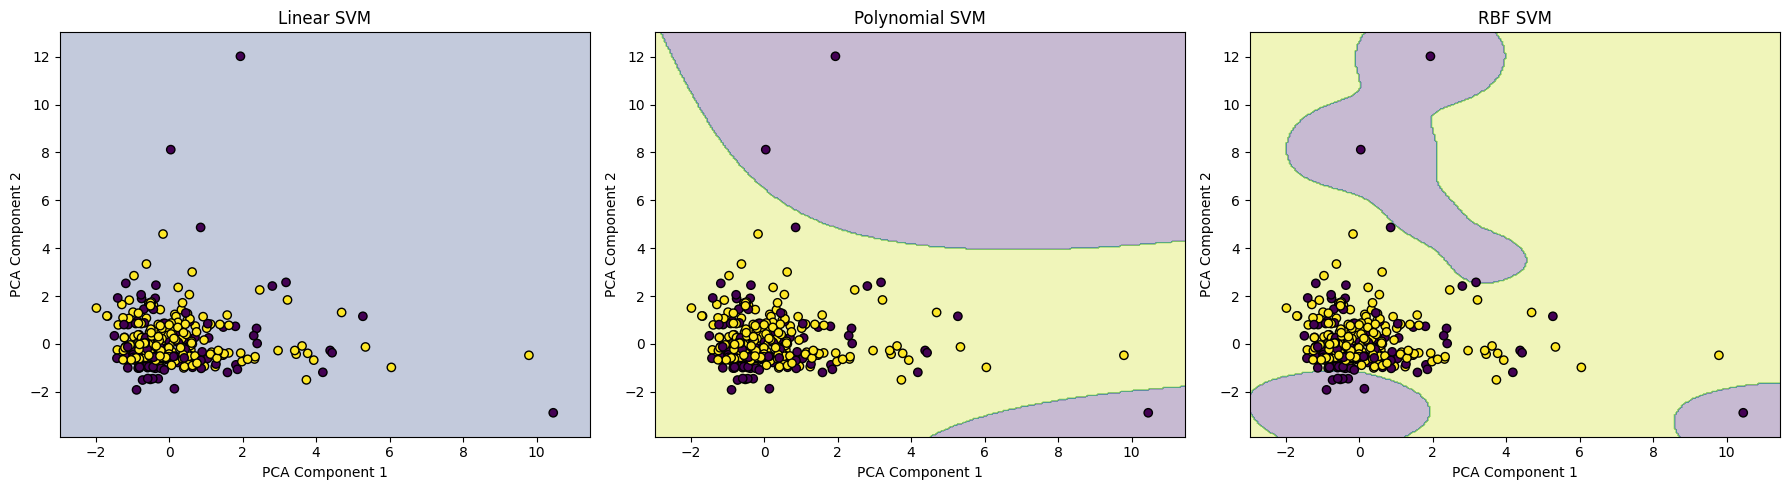

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(x_train)
X_test_2d = pca.transform(x_test)

# SVM models
models = {
    "Linear SVM": SVC(kernel='linear', C=1),
    "Polynomial SVM": SVC(kernel='poly', degree=3, C=1),
    "RBF SVM": SVC(kernel='rbf', C=1)
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, model) in zip(axes, models.items()):
    # Train on 2D data
    model.fit(X_train_2d, y_train)
    
    # Create mesh grid
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3)
    
    # Plot data points
    scatter = ax.scatter(
        X_train_2d[:, 0],
        X_train_2d[:, 1],
        c=y_train,
        edgecolor='k'
    )
    
    ax.set_title(name)
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")

plt.tight_layout()
plt.show()
